In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Загрузка и предобработка данных

In [2]:
trans1 = pd.read_csv("data/data_train/data_train/2_trans_100.csv")
trans2 = pd.read_csv("data/data_train/data_train/2_trans_2803.csv")
trans3 = pd.read_csv("data/data_train/data_train/2_trans_1017.csv")
trans4 = pd.read_csv("data/data_train/data_train/2_trans_1018.csv")

In [3]:
def read_data(filespath):
    df_mean = pd.DataFrame(index = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean'])
    df_median = pd.DataFrame(index = [ 'H2_median', 'CO_median', 'C2H4_median', 'C2H2_median'])
    df_cumsum = pd.DataFrame(index = [ 'H2_cumsum', 'CO_cumsum', 'C2H4_cumsum', 'C2H2_cumsum'])
    df_std = pd.DataFrame(index = [ 'H2_std', 'CO_std', 'C2H4_std', 'C2H2_std'])
    df_min = pd.DataFrame(index = [ 'H2_min', 'CO_min', 'C2H4_min', 'C2H2_min'])
    df_max = pd.DataFrame(index = [ 'H2_max', 'CO_max', 'C2H4_max', 'C2H2_max'])
    df_logplus = pd.DataFrame(index = ['H2_log+1', 'CO_log+1', 'C2H4_log+1', 'C2H2_log+1'])
    df_logmin = pd.DataFrame(index = [ 'H2_log-1', 'CO_log-1', 'C2H4_log-1', 'C2H2_log-1'])
    df_cummin = pd.DataFrame(index = [ 'H2_cummin', 'CO_cummin', 'C2H4_cummin', 'C2H2_cummin'])
    df_cummax = pd.DataFrame(index = [ 'H2_cummax', 'CO_cummax', 'C2H4_cummax', 'C2H2_cummax'])
    df_cumprod = pd.DataFrame(index = [ 'H2_cumprod', 'CO_cumprod', 'C2H4_cumprod', 'C2H2_cumprod'])
    df_sum = pd.DataFrame(index = [ 'H2_sum', 'CO_sum', 'C2H4_sum', 'C2H2_sum'])
    df_log10 = pd.DataFrame(index = [ 'H2_log10', 'CO_log10', 'C2H4_log10', 'C2H2_log10'])
    df_sqrt = pd.DataFrame(index = [ 'H2_sqrt', 'CO_sqrt', 'C2H4_sqrt', 'C2H2_sqrt'])
    df_square = pd.DataFrame(index = [ 'H2_square', 'CO_square', 'C2H4_square', 'C2H2_square'])
    
    
    
    for file in os.listdir(filespath):
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_mean', 'CO_mean', 'C2H4_mean', 'C2H2_mean']
        df_mean[file] = pd.DataFrame(df2.mean(), columns=[file])
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_median', 'CO_median', 'C2H4_median', 'C2H2_median']
        df_median[file] = pd.DataFrame(df2.median(), columns=[file])
        df2 = pd.read_csv(f"{filespath}/{file}", sep = ",")
        df2.columns = ['H2_cumsum', 'CO_cumsum', 'C2H4_cumsum', 'C2H2_cumsum']
        df_cumsum[file] = pd.DataFrame(df2.cumsum().mean(), columns=[file])
        df2.columns = ['H2_std', 'CO_std', 'C2H4_std', 'C2H2_std']
        df_std[file] = pd.DataFrame(df2.std(), columns=[file])
        df2.columns = ['H2_min', 'CO_min', 'C2H4_min', 'C2H2_min']
        df_min[file] = pd.DataFrame(df2.min(), columns=[file])
        df2.columns = ['H2_max', 'CO_max', 'C2H4_max', 'C2H2_max']
        df_max[file] = pd.DataFrame(df2.max(), columns=[file])
        df2.columns = ['H2_log+1', 'CO_log+1', 'C2H4_log+1', 'C2H2_log+1']
        df_logplus[file] = pd.DataFrame((df2+1).transform(np.log).mean(), columns=[file])
        df2.columns = ['H2_log-1', 'CO_log-1', 'C2H4_log-1', 'C2H2_log-1']
        df_logmin[file] = pd.DataFrame((df2.min()+1).transform(np.log), columns=[file])
        df2.columns = ['H2_cummin', 'CO_cummin', 'C2H4_cummin', 'C2H2_cummin']
        df_cummin[file] = pd.DataFrame(df2.cummin().mean(), columns=[file])
        df2.columns = ['H2_cummax', 'CO_cummax', 'C2H4_cummax', 'C2H2_cummax']
        df_cummax[file] = pd.DataFrame(df2.cummax().mean(), columns=[file])
        df2.columns = ['H2_cumprod', 'CO_cumprod', 'C2H4_cumprod', 'C2H2_cumprod']
        df_cumprod[file] = pd.DataFrame(df2.cumsum().mean(), columns=[file])
        df2.columns = ['H2_sum', 'CO_sum', 'C2H4_sum', 'C2H2_sum']
        df_sum[file] = pd.DataFrame(df2.sum(), columns=[file])
        df2.columns = ['H2_log10', 'CO_log10', 'C2H4_log10', 'C2H2_log10']
        df_log10[file] = pd.DataFrame(np.log10(df2 + 1).median(), columns=[file])
        df2.columns = ['H2_sqrt', 'CO_sqrt', 'C2H4_sqrt', 'C2H2_sqrt']
        df_sqrt[file] = pd.DataFrame((df2 ** (1/2)).median(), columns=[file])
        df2.columns = ['H2_square', 'CO_square', 'C2H4_square', 'C2H2_square']
        df_square[file] = pd.DataFrame((df2 ** (2)).median(), columns=[file])
        
    df_mean =  df_mean.T
    df_median = df_median.T
    df_cumsum = df_cumsum.T
    df_std =  df_std.T
    df_min =  df_min.T
    df_max =  df_max.T
    df_logplus = df_logplus.T
    df_logmin = df_logmin.T
    df_cummin = df_cummin.T
    df_cummax  = df_cummax.T
    df_cumprod = df_cumprod.T
    df_sum =  df_sum.T
    df_log10 = df_log10.T
    df_sqrt =  df_sqrt.T
    df_square  = df_square.T

    df_all = pd.concat([df_mean, df_median, df_cumsum, df_std, df_max, df_logplus, 
                        df_logmin, df_cummax, df_cumprod, df_sum,  
                        df_log10, df_sqrt, df_square], axis = 1)
    
    return df_all

In [4]:
train_labels = pd.read_csv("transformer-time/train.csv")
train_labels.sort_values("id", inplace = True)
train_labels.set_index("id", inplace = True)

In [5]:
df = read_data("transformer-time/data_train/data_train/")
df["label"] = train_labels["predicted"]

In [6]:
df.head().T

,2_trans_100.csv,2_trans_1000.csv,2_trans_1001.csv,2_trans_1002.csv,2_trans_1006.csv
H2_mean,2.589662e-03,2.824798e-03,2.763750e-03,5.076659e-04,2.654301e-03
CO_mean,1.649062e-02,1.472766e-02,1.703004e-02,1.633359e-02,2.127816e-02
C2H4_mean,2.875930e-03,1.991809e-03,3.394097e-03,4.104338e-03,4.067657e-03
C2H2_mean,3.358969e-04,3.394161e-04,1.953862e-04,3.799403e-04,1.239843e-04
H2_median,2.552281e-03,2.679959e-03,2.619918e-03,4.127814e-04,2.656727e-03
CO_median,1.628978e-02,1.232109e-02,1.573614e-02,1.555863e-02,2.133670e-02
C2H4_median,2.775128e-03,2.006427e-03,3.190371e-03,3.827293e-03,3.687027e-03
C2H2_median,3.164678e-04,3.377767e-04,1.841197e-04,3.508388e-04,1.148003e-04
H2_cumsum,5.328672e-01,5.364329e-01,5.458305e-01,8.837345e-02,5.577146e-01
CO_cumsum,3.385075e+00,2.449016e+00,3.228740e+00,3.221250e+00,4.297819e+00


In [7]:
df.to_csv("transformators_regression.csv", index = False)

In [ ]:
df = pd.read_csv("transformators_regression.csv")

# Корреляции

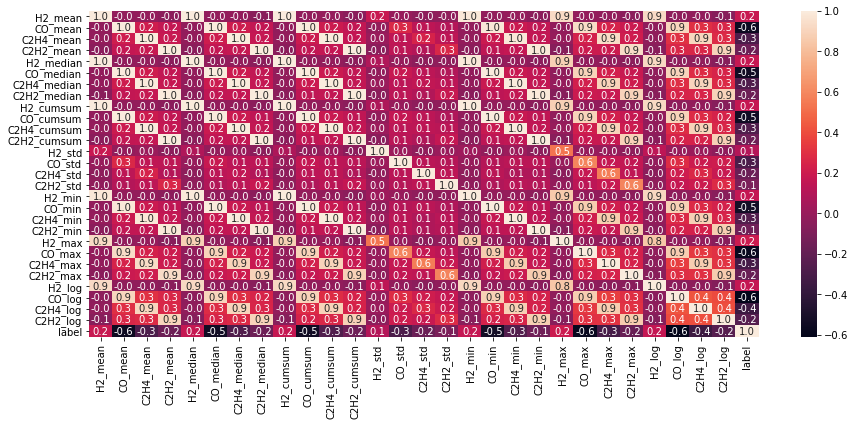

In [26]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True, fmt = ".1f");

# Базовые решения

In [10]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
X, y = df.drop("label", axis = 1), df["label"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [19]:
lgbm = LGBMRegressor(n_estimators=54, learning_rate= 0.1, random_state=1, num_leaves = 23)

In [14]:
lgbm.fit(x_train, y_train)

LGBMRegressor(n_estimators=54, num_leaves=23, random_state=1)

In [20]:
lgbm.fit(X, y)

LGBMRegressor(n_estimators=54, num_leaves=23, random_state=1)

In [16]:
y_pred = lgbm.predict(x_test).astype("int")

In [17]:
mean_absolute_error(y_test, y_pred)
#y_pred.astype("int")

82.37142857142857

**XGBoost**

In [582]:
xgb = XGBRegressor(n_estimators=60, learning_rate = 0.1, random_state = 1)

In [583]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [586]:
y_pred = xgb.predict(x_test).astype("int")

In [587]:
mean_absolute_error(y_test, y_pred)
#y_pred.astype("int")

85.34761904761905

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

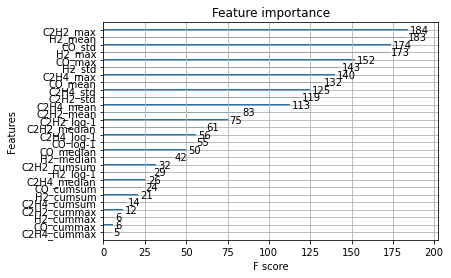

In [395]:
plot_importance(xgb)

### RandomForest

In [18]:
rf = RandomForestRegressor(n_estimators=300, min_samples_leaf = 1, random_state=42)

In [19]:
rf.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=42)

In [590]:
y_pred = rf.predict(x_test).astype("int")

In [591]:
mean_absolute_error(y_test, y_pred)
#y_pred.astype("int")

85.65238095238095

# CatBoostRegressor

In [400]:
cb_regr = CatBoostRegressor(learning_rate=0.1, iterations = 3000)

In [401]:
cb_regr.fit(x_train, y_train)

0:	learn: 231.3575987	total: 11.2ms	remaining: 33.7s
1:	learn: 218.8018650	total: 20ms	remaining: 30s
2:	learn: 208.1486938	total: 29.1ms	remaining: 29.1s
3:	learn: 197.7195994	total: 38.2ms	remaining: 28.6s
4:	learn: 188.8310012	total: 46ms	remaining: 27.6s
5:	learn: 181.4049558	total: 56.1ms	remaining: 28s
6:	learn: 174.3654697	total: 64.6ms	remaining: 27.6s
7:	learn: 168.2831612	total: 74.5ms	remaining: 27.9s
8:	learn: 162.6407354	total: 83.2ms	remaining: 27.7s
9:	learn: 157.6484756	total: 92.2ms	remaining: 27.6s
10:	learn: 153.0421340	total: 101ms	remaining: 27.5s
11:	learn: 148.4346642	total: 111ms	remaining: 27.5s
12:	learn: 145.0637840	total: 120ms	remaining: 27.5s
13:	learn: 141.9033842	total: 128ms	remaining: 27.3s
14:	learn: 138.8326770	total: 137ms	remaining: 27.3s
15:	learn: 136.4256370	total: 145ms	remaining: 27.1s
16:	learn: 133.8962288	total: 156ms	remaining: 27.4s
17:	learn: 132.0874393	total: 166ms	remaining: 27.4s
18:	learn: 129.9714733	total: 174ms	remaining: 27.2s
1

166:	learn: 87.5534952	total: 1.63s	remaining: 27.7s
167:	learn: 87.4606798	total: 1.64s	remaining: 27.7s
168:	learn: 87.2676103	total: 1.65s	remaining: 27.7s
169:	learn: 87.2415208	total: 1.66s	remaining: 27.6s
170:	learn: 87.0686786	total: 1.67s	remaining: 27.6s
171:	learn: 86.8096591	total: 1.68s	remaining: 27.6s
172:	learn: 86.7357358	total: 1.69s	remaining: 27.6s
173:	learn: 86.6313935	total: 1.7s	remaining: 27.6s
174:	learn: 86.4984540	total: 1.71s	remaining: 27.5s
175:	learn: 86.3601025	total: 1.72s	remaining: 27.5s
176:	learn: 86.1953986	total: 1.73s	remaining: 27.5s
177:	learn: 86.0929785	total: 1.74s	remaining: 27.5s
178:	learn: 85.7929051	total: 1.75s	remaining: 27.5s
179:	learn: 85.6904264	total: 1.75s	remaining: 27.5s
180:	learn: 85.6345975	total: 1.76s	remaining: 27.5s
181:	learn: 85.5113187	total: 1.77s	remaining: 27.5s
182:	learn: 85.2837869	total: 1.78s	remaining: 27.4s
183:	learn: 85.0534759	total: 1.79s	remaining: 27.4s
184:	learn: 84.9306301	total: 1.8s	remaining: 2

329:	learn: 67.1326221	total: 3.24s	remaining: 26.2s
330:	learn: 67.0204272	total: 3.26s	remaining: 26.3s
331:	learn: 66.8969913	total: 3.27s	remaining: 26.3s
332:	learn: 66.7957546	total: 3.28s	remaining: 26.3s
333:	learn: 66.6449753	total: 3.29s	remaining: 26.2s
334:	learn: 66.5310752	total: 3.3s	remaining: 26.3s
335:	learn: 66.4220710	total: 3.31s	remaining: 26.2s
336:	learn: 66.3855062	total: 3.32s	remaining: 26.2s
337:	learn: 66.3020256	total: 3.33s	remaining: 26.2s
338:	learn: 66.2418770	total: 3.34s	remaining: 26.2s
339:	learn: 66.1462582	total: 3.35s	remaining: 26.2s
340:	learn: 66.0696333	total: 3.36s	remaining: 26.2s
341:	learn: 65.9791589	total: 3.37s	remaining: 26.2s
342:	learn: 65.9275084	total: 3.38s	remaining: 26.2s
343:	learn: 65.7624923	total: 3.39s	remaining: 26.1s
344:	learn: 65.6888737	total: 3.4s	remaining: 26.2s
345:	learn: 65.6255722	total: 3.41s	remaining: 26.2s
346:	learn: 65.5448074	total: 3.42s	remaining: 26.2s
347:	learn: 65.3794079	total: 3.43s	remaining: 2

487:	learn: 52.4233363	total: 4.99s	remaining: 25.7s
488:	learn: 52.3180789	total: 5.01s	remaining: 25.7s
489:	learn: 52.2699224	total: 5.01s	remaining: 25.7s
490:	learn: 52.1528828	total: 5.02s	remaining: 25.7s
491:	learn: 52.1105478	total: 5.04s	remaining: 25.7s
492:	learn: 51.9886003	total: 5.04s	remaining: 25.7s
493:	learn: 51.9419355	total: 5.05s	remaining: 25.6s
494:	learn: 51.8594171	total: 5.06s	remaining: 25.6s
495:	learn: 51.7967197	total: 5.07s	remaining: 25.6s
496:	learn: 51.6441666	total: 5.08s	remaining: 25.6s
497:	learn: 51.5471677	total: 5.09s	remaining: 25.6s
498:	learn: 51.4379525	total: 5.1s	remaining: 25.6s
499:	learn: 51.3586097	total: 5.11s	remaining: 25.5s
500:	learn: 51.3309350	total: 5.12s	remaining: 25.5s
501:	learn: 51.2714936	total: 5.13s	remaining: 25.5s
502:	learn: 51.1575360	total: 5.14s	remaining: 25.5s
503:	learn: 51.0649063	total: 5.15s	remaining: 25.5s
504:	learn: 50.9733952	total: 5.15s	remaining: 25.5s
505:	learn: 50.8781622	total: 5.16s	remaining: 

653:	learn: 41.3235371	total: 6.61s	remaining: 23.7s
654:	learn: 41.2383752	total: 6.62s	remaining: 23.7s
655:	learn: 41.1716687	total: 6.63s	remaining: 23.7s
656:	learn: 41.1031442	total: 6.64s	remaining: 23.7s
657:	learn: 41.0123471	total: 6.64s	remaining: 23.6s
658:	learn: 40.9650667	total: 6.66s	remaining: 23.6s
659:	learn: 40.9096750	total: 6.67s	remaining: 23.6s
660:	learn: 40.8491185	total: 6.67s	remaining: 23.6s
661:	learn: 40.7839676	total: 6.68s	remaining: 23.6s
662:	learn: 40.7673191	total: 6.69s	remaining: 23.6s
663:	learn: 40.6779970	total: 6.7s	remaining: 23.6s
664:	learn: 40.5998546	total: 6.71s	remaining: 23.6s
665:	learn: 40.5291240	total: 6.72s	remaining: 23.5s
666:	learn: 40.5167145	total: 6.73s	remaining: 23.5s
667:	learn: 40.4250422	total: 6.74s	remaining: 23.5s
668:	learn: 40.3804608	total: 6.75s	remaining: 23.5s
669:	learn: 40.3201877	total: 6.75s	remaining: 23.5s
670:	learn: 40.3162594	total: 6.76s	remaining: 23.5s
671:	learn: 40.3018170	total: 6.77s	remaining: 

819:	learn: 32.6475831	total: 8.22s	remaining: 21.9s
820:	learn: 32.6109109	total: 8.23s	remaining: 21.9s
821:	learn: 32.5664197	total: 8.24s	remaining: 21.8s
822:	learn: 32.5488432	total: 8.25s	remaining: 21.8s
823:	learn: 32.5040184	total: 8.26s	remaining: 21.8s
824:	learn: 32.4829072	total: 8.27s	remaining: 21.8s
825:	learn: 32.4363510	total: 8.28s	remaining: 21.8s
826:	learn: 32.4108045	total: 8.29s	remaining: 21.8s
827:	learn: 32.3535521	total: 8.3s	remaining: 21.8s
828:	learn: 32.3274815	total: 8.31s	remaining: 21.8s
829:	learn: 32.2863397	total: 8.32s	remaining: 21.8s
830:	learn: 32.2512126	total: 8.33s	remaining: 21.7s
831:	learn: 32.2240912	total: 8.34s	remaining: 21.7s
832:	learn: 32.1721899	total: 8.35s	remaining: 21.7s
833:	learn: 32.1448376	total: 8.36s	remaining: 21.7s
834:	learn: 32.0851680	total: 8.37s	remaining: 21.7s
835:	learn: 32.0533747	total: 8.37s	remaining: 21.7s
836:	learn: 32.0037784	total: 8.38s	remaining: 21.7s
837:	learn: 31.9824101	total: 8.39s	remaining: 

987:	learn: 26.6168252	total: 9.84s	remaining: 20s
988:	learn: 26.5722599	total: 9.85s	remaining: 20s
989:	learn: 26.5132672	total: 9.86s	remaining: 20s
990:	learn: 26.5021619	total: 9.87s	remaining: 20s
991:	learn: 26.4644007	total: 9.88s	remaining: 20s
992:	learn: 26.4368487	total: 9.89s	remaining: 20s
993:	learn: 26.3831981	total: 9.9s	remaining: 20s
994:	learn: 26.3362401	total: 9.92s	remaining: 20s
995:	learn: 26.2984827	total: 9.93s	remaining: 20s
996:	learn: 26.2648364	total: 9.94s	remaining: 20s
997:	learn: 26.2118490	total: 9.95s	remaining: 20s
998:	learn: 26.1773127	total: 9.95s	remaining: 19.9s
999:	learn: 26.1403910	total: 9.96s	remaining: 19.9s
1000:	learn: 26.0953100	total: 9.98s	remaining: 19.9s
1001:	learn: 26.0873245	total: 9.98s	remaining: 19.9s
1002:	learn: 26.0804418	total: 9.99s	remaining: 19.9s
1003:	learn: 26.0766216	total: 10s	remaining: 19.9s
1004:	learn: 26.0376068	total: 10s	remaining: 19.9s
1005:	learn: 26.0273284	total: 10s	remaining: 19.9s
1006:	learn: 26.

1147:	learn: 21.2241920	total: 11.4s	remaining: 18.5s
1148:	learn: 21.1974575	total: 11.5s	remaining: 18.5s
1149:	learn: 21.1734939	total: 11.5s	remaining: 18.4s
1150:	learn: 21.1556969	total: 11.5s	remaining: 18.4s
1151:	learn: 21.1179246	total: 11.5s	remaining: 18.4s
1152:	learn: 21.0888262	total: 11.5s	remaining: 18.4s
1153:	learn: 21.0601726	total: 11.5s	remaining: 18.4s
1154:	learn: 21.0494041	total: 11.5s	remaining: 18.4s
1155:	learn: 21.0133530	total: 11.5s	remaining: 18.4s
1156:	learn: 20.9984163	total: 11.5s	remaining: 18.4s
1157:	learn: 20.9620736	total: 11.5s	remaining: 18.4s
1158:	learn: 20.9259776	total: 11.6s	remaining: 18.4s
1159:	learn: 20.9153927	total: 11.6s	remaining: 18.3s
1160:	learn: 20.8872098	total: 11.6s	remaining: 18.3s
1161:	learn: 20.8496612	total: 11.6s	remaining: 18.3s
1162:	learn: 20.8254051	total: 11.6s	remaining: 18.3s
1163:	learn: 20.7887989	total: 11.6s	remaining: 18.3s
1164:	learn: 20.7441841	total: 11.6s	remaining: 18.3s
1165:	learn: 20.7272296	tota

1315:	learn: 16.9861236	total: 13.2s	remaining: 16.9s
1316:	learn: 16.9644759	total: 13.2s	remaining: 16.9s
1317:	learn: 16.9383813	total: 13.3s	remaining: 16.9s
1318:	learn: 16.9298161	total: 13.3s	remaining: 16.9s
1319:	learn: 16.9212649	total: 13.3s	remaining: 16.9s
1320:	learn: 16.8973555	total: 13.3s	remaining: 16.9s
1321:	learn: 16.8872299	total: 13.3s	remaining: 16.9s
1322:	learn: 16.8589105	total: 13.3s	remaining: 16.9s
1323:	learn: 16.8279318	total: 13.3s	remaining: 16.8s
1324:	learn: 16.8012026	total: 13.3s	remaining: 16.8s
1325:	learn: 16.7900814	total: 13.3s	remaining: 16.8s
1326:	learn: 16.7797183	total: 13.3s	remaining: 16.8s
1327:	learn: 16.7529992	total: 13.3s	remaining: 16.8s
1328:	learn: 16.7174440	total: 13.4s	remaining: 16.8s
1329:	learn: 16.7079224	total: 13.4s	remaining: 16.8s
1330:	learn: 16.6874443	total: 13.4s	remaining: 16.8s
1331:	learn: 16.6619823	total: 13.4s	remaining: 16.8s
1332:	learn: 16.6272231	total: 13.4s	remaining: 16.7s
1333:	learn: 16.5963181	tota

1483:	learn: 13.7695702	total: 14.9s	remaining: 15.2s
1484:	learn: 13.7551470	total: 14.9s	remaining: 15.2s
1485:	learn: 13.7468891	total: 14.9s	remaining: 15.2s
1486:	learn: 13.7100521	total: 14.9s	remaining: 15.1s
1487:	learn: 13.6841510	total: 14.9s	remaining: 15.1s
1488:	learn: 13.6756905	total: 14.9s	remaining: 15.1s
1489:	learn: 13.6649873	total: 14.9s	remaining: 15.1s
1490:	learn: 13.6490064	total: 14.9s	remaining: 15.1s
1491:	learn: 13.6268802	total: 14.9s	remaining: 15.1s
1492:	learn: 13.6081492	total: 15s	remaining: 15.1s
1493:	learn: 13.5865818	total: 15s	remaining: 15.1s
1494:	learn: 13.5775817	total: 15s	remaining: 15.1s
1495:	learn: 13.5633939	total: 15s	remaining: 15.1s
1496:	learn: 13.5536645	total: 15s	remaining: 15.1s
1497:	learn: 13.5433643	total: 15s	remaining: 15s
1498:	learn: 13.5183342	total: 15s	remaining: 15s
1499:	learn: 13.5044740	total: 15s	remaining: 15s
1500:	learn: 13.5037286	total: 15s	remaining: 15s
1501:	learn: 13.4705310	total: 15.1s	remaining: 15s
15

1641:	learn: 11.3284373	total: 16.6s	remaining: 13.7s
1642:	learn: 11.3126261	total: 16.6s	remaining: 13.7s
1643:	learn: 11.3121082	total: 16.6s	remaining: 13.7s
1644:	learn: 11.3038495	total: 16.6s	remaining: 13.7s
1645:	learn: 11.2851555	total: 16.6s	remaining: 13.7s
1646:	learn: 11.2626166	total: 16.6s	remaining: 13.7s
1647:	learn: 11.2497678	total: 16.6s	remaining: 13.6s
1648:	learn: 11.2435936	total: 16.6s	remaining: 13.6s
1649:	learn: 11.2321429	total: 16.7s	remaining: 13.6s
1650:	learn: 11.2218960	total: 16.7s	remaining: 13.6s
1651:	learn: 11.2004892	total: 16.7s	remaining: 13.6s
1652:	learn: 11.1849660	total: 16.7s	remaining: 13.6s
1653:	learn: 11.1687194	total: 16.7s	remaining: 13.6s
1654:	learn: 11.1600914	total: 16.7s	remaining: 13.6s
1655:	learn: 11.1354439	total: 16.7s	remaining: 13.6s
1656:	learn: 11.1204250	total: 16.7s	remaining: 13.6s
1657:	learn: 11.1152473	total: 16.7s	remaining: 13.6s
1658:	learn: 11.1003751	total: 16.8s	remaining: 13.5s
1659:	learn: 11.0744065	tota

1808:	learn: 9.1303586	total: 18.4s	remaining: 12.1s
1809:	learn: 9.1229368	total: 18.4s	remaining: 12.1s
1810:	learn: 9.1128060	total: 18.4s	remaining: 12.1s
1811:	learn: 9.0904557	total: 18.4s	remaining: 12.1s
1812:	learn: 9.0771013	total: 18.4s	remaining: 12.1s
1813:	learn: 9.0713354	total: 18.4s	remaining: 12s
1814:	learn: 9.0600749	total: 18.4s	remaining: 12s
1815:	learn: 9.0557784	total: 18.4s	remaining: 12s
1816:	learn: 9.0511182	total: 18.4s	remaining: 12s
1817:	learn: 9.0415508	total: 18.5s	remaining: 12s
1818:	learn: 9.0222356	total: 18.5s	remaining: 12s
1819:	learn: 9.0102609	total: 18.5s	remaining: 12s
1820:	learn: 8.9999311	total: 18.5s	remaining: 12s
1821:	learn: 8.9796411	total: 18.5s	remaining: 12s
1822:	learn: 8.9672519	total: 18.5s	remaining: 12s
1823:	learn: 8.9600447	total: 18.5s	remaining: 11.9s
1824:	learn: 8.9483437	total: 18.5s	remaining: 11.9s
1825:	learn: 8.9396508	total: 18.5s	remaining: 11.9s
1826:	learn: 8.9290746	total: 18.6s	remaining: 11.9s
1827:	learn: 

1966:	learn: 7.5566704	total: 20s	remaining: 10.5s
1967:	learn: 7.5482951	total: 20s	remaining: 10.5s
1968:	learn: 7.5450473	total: 20s	remaining: 10.5s
1969:	learn: 7.5234299	total: 20s	remaining: 10.5s
1970:	learn: 7.5163536	total: 20s	remaining: 10.5s
1971:	learn: 7.5085523	total: 20s	remaining: 10.4s
1972:	learn: 7.4993802	total: 20.1s	remaining: 10.4s
1973:	learn: 7.4901214	total: 20.1s	remaining: 10.4s
1974:	learn: 7.4820551	total: 20.1s	remaining: 10.4s
1975:	learn: 7.4672875	total: 20.1s	remaining: 10.4s
1976:	learn: 7.4573003	total: 20.1s	remaining: 10.4s
1977:	learn: 7.4529347	total: 20.1s	remaining: 10.4s
1978:	learn: 7.4370318	total: 20.1s	remaining: 10.4s
1979:	learn: 7.4226195	total: 20.1s	remaining: 10.4s
1980:	learn: 7.4180997	total: 20.1s	remaining: 10.4s
1981:	learn: 7.4086604	total: 20.1s	remaining: 10.3s
1982:	learn: 7.4056323	total: 20.2s	remaining: 10.3s
1983:	learn: 7.3995875	total: 20.2s	remaining: 10.3s
1984:	learn: 7.3934502	total: 20.2s	remaining: 10.3s
1985:

2138:	learn: 6.0787852	total: 21.7s	remaining: 8.74s
2139:	learn: 6.0719307	total: 21.7s	remaining: 8.73s
2140:	learn: 6.0646687	total: 21.7s	remaining: 8.72s
2141:	learn: 6.0579510	total: 21.7s	remaining: 8.71s
2142:	learn: 6.0553077	total: 21.8s	remaining: 8.7s
2143:	learn: 6.0456295	total: 21.8s	remaining: 8.69s
2144:	learn: 6.0406134	total: 21.8s	remaining: 8.68s
2145:	learn: 6.0319065	total: 21.8s	remaining: 8.67s
2146:	learn: 6.0149232	total: 21.8s	remaining: 8.66s
2147:	learn: 6.0128322	total: 21.8s	remaining: 8.65s
2148:	learn: 6.0083678	total: 21.8s	remaining: 8.63s
2149:	learn: 6.0052809	total: 21.8s	remaining: 8.63s
2150:	learn: 6.0026150	total: 21.8s	remaining: 8.61s
2151:	learn: 5.9950466	total: 21.8s	remaining: 8.6s
2152:	learn: 5.9871947	total: 21.8s	remaining: 8.59s
2153:	learn: 5.9761714	total: 21.9s	remaining: 8.58s
2154:	learn: 5.9710771	total: 21.9s	remaining: 8.57s
2155:	learn: 5.9668489	total: 21.9s	remaining: 8.56s
2156:	learn: 5.9595496	total: 21.9s	remaining: 8

2309:	learn: 4.9401329	total: 23.3s	remaining: 6.97s
2310:	learn: 4.9347404	total: 23.3s	remaining: 6.96s
2311:	learn: 4.9289337	total: 23.4s	remaining: 6.95s
2312:	learn: 4.9251593	total: 23.4s	remaining: 6.94s
2313:	learn: 4.9185235	total: 23.4s	remaining: 6.93s
2314:	learn: 4.9115763	total: 23.4s	remaining: 6.92s
2315:	learn: 4.9098712	total: 23.4s	remaining: 6.91s
2316:	learn: 4.9026810	total: 23.4s	remaining: 6.9s
2317:	learn: 4.8934613	total: 23.4s	remaining: 6.89s
2318:	learn: 4.8898138	total: 23.4s	remaining: 6.88s
2319:	learn: 4.8795849	total: 23.4s	remaining: 6.87s
2320:	learn: 4.8684890	total: 23.4s	remaining: 6.86s
2321:	learn: 4.8594363	total: 23.4s	remaining: 6.84s
2322:	learn: 4.8539533	total: 23.5s	remaining: 6.83s
2323:	learn: 4.8497808	total: 23.5s	remaining: 6.82s
2324:	learn: 4.8463643	total: 23.5s	remaining: 6.81s
2325:	learn: 4.8428479	total: 23.5s	remaining: 6.8s
2326:	learn: 4.8379385	total: 23.5s	remaining: 6.79s
2327:	learn: 4.8346816	total: 23.5s	remaining: 6

2476:	learn: 4.0398362	total: 24.9s	remaining: 5.26s
2477:	learn: 4.0351876	total: 24.9s	remaining: 5.25s
2478:	learn: 4.0321917	total: 25s	remaining: 5.24s
2479:	learn: 4.0288993	total: 25s	remaining: 5.23s
2480:	learn: 4.0256004	total: 25s	remaining: 5.22s
2481:	learn: 4.0180204	total: 25s	remaining: 5.21s
2482:	learn: 4.0140376	total: 25s	remaining: 5.2s
2483:	learn: 4.0107319	total: 25s	remaining: 5.19s
2484:	learn: 4.0060448	total: 25s	remaining: 5.18s
2485:	learn: 3.9975376	total: 25s	remaining: 5.17s
2486:	learn: 3.9930324	total: 25s	remaining: 5.16s
2487:	learn: 3.9897902	total: 25s	remaining: 5.15s
2488:	learn: 3.9856111	total: 25s	remaining: 5.14s
2489:	learn: 3.9818561	total: 25.1s	remaining: 5.13s
2490:	learn: 3.9792128	total: 25.1s	remaining: 5.12s
2491:	learn: 3.9753200	total: 25.1s	remaining: 5.11s
2492:	learn: 3.9730119	total: 25.1s	remaining: 5.1s
2493:	learn: 3.9711220	total: 25.1s	remaining: 5.09s
2494:	learn: 3.9680753	total: 25.1s	remaining: 5.08s
2495:	learn: 3.96

2637:	learn: 3.3555482	total: 26.5s	remaining: 3.64s
2638:	learn: 3.3523576	total: 26.6s	remaining: 3.63s
2639:	learn: 3.3439940	total: 26.6s	remaining: 3.62s
2640:	learn: 3.3391455	total: 26.6s	remaining: 3.61s
2641:	learn: 3.3339632	total: 26.6s	remaining: 3.6s
2642:	learn: 3.3320954	total: 26.6s	remaining: 3.59s
2643:	learn: 3.3304054	total: 26.6s	remaining: 3.58s
2644:	learn: 3.3276017	total: 26.6s	remaining: 3.57s
2645:	learn: 3.3262114	total: 26.6s	remaining: 3.56s
2646:	learn: 3.3196451	total: 26.6s	remaining: 3.55s
2647:	learn: 3.3136147	total: 26.6s	remaining: 3.54s
2648:	learn: 3.3100388	total: 26.7s	remaining: 3.53s
2649:	learn: 3.3068628	total: 26.7s	remaining: 3.52s
2650:	learn: 3.3036935	total: 26.7s	remaining: 3.51s
2651:	learn: 3.3004179	total: 26.7s	remaining: 3.5s
2652:	learn: 3.2964775	total: 26.7s	remaining: 3.49s
2653:	learn: 3.2941775	total: 26.7s	remaining: 3.48s
2654:	learn: 3.2876429	total: 26.7s	remaining: 3.47s
2655:	learn: 3.2855890	total: 26.7s	remaining: 3

2798:	learn: 2.8117545	total: 28.2s	remaining: 2.02s
2799:	learn: 2.8088078	total: 28.2s	remaining: 2.01s
2800:	learn: 2.8063799	total: 28.2s	remaining: 2s
2801:	learn: 2.8043235	total: 28.2s	remaining: 1.99s
2802:	learn: 2.8003856	total: 28.2s	remaining: 1.98s
2803:	learn: 2.7982728	total: 28.2s	remaining: 1.97s
2804:	learn: 2.7938677	total: 28.2s	remaining: 1.96s
2805:	learn: 2.7882181	total: 28.2s	remaining: 1.95s
2806:	learn: 2.7825189	total: 28.2s	remaining: 1.94s
2807:	learn: 2.7808193	total: 28.2s	remaining: 1.93s
2808:	learn: 2.7766659	total: 28.2s	remaining: 1.92s
2809:	learn: 2.7718131	total: 28.3s	remaining: 1.91s
2810:	learn: 2.7679545	total: 28.3s	remaining: 1.9s
2811:	learn: 2.7662807	total: 28.3s	remaining: 1.89s
2812:	learn: 2.7640141	total: 28.3s	remaining: 1.88s
2813:	learn: 2.7597284	total: 28.3s	remaining: 1.87s
2814:	learn: 2.7549131	total: 28.3s	remaining: 1.86s
2815:	learn: 2.7510498	total: 28.3s	remaining: 1.85s
2816:	learn: 2.7484490	total: 28.3s	remaining: 1.8

2966:	learn: 2.3243238	total: 29.8s	remaining: 331ms
2967:	learn: 2.3199020	total: 29.8s	remaining: 321ms
2968:	learn: 2.3191472	total: 29.8s	remaining: 311ms
2969:	learn: 2.3137594	total: 29.8s	remaining: 301ms
2970:	learn: 2.3106484	total: 29.8s	remaining: 291ms
2971:	learn: 2.3063241	total: 29.8s	remaining: 281ms
2972:	learn: 2.3047104	total: 29.8s	remaining: 271ms
2973:	learn: 2.2998657	total: 29.8s	remaining: 261ms
2974:	learn: 2.2972776	total: 29.9s	remaining: 251ms
2975:	learn: 2.2949287	total: 29.9s	remaining: 241ms
2976:	learn: 2.2934730	total: 29.9s	remaining: 231ms
2977:	learn: 2.2886792	total: 29.9s	remaining: 221ms
2978:	learn: 2.2879482	total: 29.9s	remaining: 211ms
2979:	learn: 2.2862827	total: 29.9s	remaining: 201ms
2980:	learn: 2.2831064	total: 29.9s	remaining: 191ms
2981:	learn: 2.2804711	total: 29.9s	remaining: 181ms
2982:	learn: 2.2785464	total: 29.9s	remaining: 171ms
2983:	learn: 2.2764922	total: 29.9s	remaining: 161ms
2984:	learn: 2.2728463	total: 30s	remaining: 1

In [592]:
y_pred = cb_regr.predict(x_test).astype("int")

In [593]:
mean_absolute_error(y_test, y_pred)
#y_pred.astype("int")

92.26190476190476

## Формирование submit

In [21]:
test = read_data("transformer-time/data_test/data_test/")

In [22]:
test

,H2_mean,CO_mean,C2H4_mean,C2H2_mean,H2_median,CO_median,C2H4_median,C2H2_median,H2_cumsum,CO_cumsum,...,C2H4_sqrt,C2H2_sqrt,H2_square,CO_square,C2H4_square,C2H2_square,H2_fft,CO_fft,C2H4_fft,C2H2_fft
2_trans_1.csv,0.002516,0.002202,0.006610,0.000112,0.002428,0.002919,0.006567,0.000101,0.481000,0.313492,...,0.081038,0.010031,5.893314e-06,0.000009,4.312815e-05,1.012454e-08,0.005309,0.009990,0.007123,0.000356
2_trans_10.csv,0.002352,0.016855,0.004122,0.000348,0.002104,0.015033,0.003981,0.000338,0.453187,3.232096,...,0.063092,0.018388,4.426334e-06,0.000226,1.584519e-05,1.143323e-07,0.005239,0.039326,0.008281,0.000581
2_trans_1003.csv,0.000898,0.032870,0.004446,0.000047,0.000735,0.031011,0.004198,0.000046,0.154364,6.563330,...,0.064792,0.006786,5.404224e-07,0.000962,1.762270e-05,2.120298e-09,0.003679,0.059663,0.010168,0.000125
2_trans_1004.csv,0.001704,0.006800,0.008197,0.000171,0.001610,0.007031,0.008271,0.000166,0.312146,1.358186,...,0.090947,0.012898,2.591440e-06,0.000049,6.841494e-05,2.767694e-08,0.004398,0.011953,0.009943,0.000342
2_trans_1005.csv,0.002751,0.011035,0.003372,0.000375,0.002571,0.009832,0.002469,0.000352,0.541230,2.065337,...,0.049692,0.018766,6.611303e-06,0.000097,6.097669e-06,1.240102e-07,0.005854,0.033399,0.016276,0.000665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_trans_987.csv,0.001739,0.023907,0.008370,0.000328,0.001635,0.024018,0.008371,0.000331,0.320990,4.770928,...,0.091492,0.018180,2.671617e-06,0.000577,7.007004e-05,1.092487e-07,0.004302,0.038522,0.008655,0.000389
2_trans_990.csv,0.000687,0.015052,0.007064,0.000223,0.000648,0.013474,0.006890,0.000223,0.113785,2.599687,...,0.083005,0.014935,4.205195e-07,0.000182,4.746904e-05,4.975571e-08,0.002873,0.048719,0.013631,0.000365
2_trans_991.csv,0.000391,0.020923,0.009325,0.000138,0.000375,0.021118,0.009011,0.000137,0.067934,4.267890,...,0.094925,0.011725,1.403210e-07,0.000446,8.119338e-05,1.890026e-08,0.001389,0.030934,0.017499,0.000417
2_trans_998.csv,0.002880,0.007438,0.001359,0.000382,0.002863,0.006222,0.000958,0.000371,0.584399,1.188551,...,0.030954,0.019267,8.196425e-06,0.000039,9.180895e-07,1.378041e-07,0.004287,0.032853,0.008796,0.000631


In [23]:
test_pred = lgbm.predict(test)

In [24]:
submit = pd.DataFrame(data = {"id": test.index, "predicted": test_pred.astype("int")})

In [25]:
submit.to_csv("test_regr2.csv", index = False)

In [26]:
pd.read_csv("test_regr2.csv")

,id,predicted
0,2_trans_1.csv,732
1,2_trans_10.csv,620
2,2_trans_1003.csv,604
3,2_trans_1004.csv,992
4,2_trans_1005.csv,584
...,...,...
895,2_trans_987.csv,997
896,2_trans_990.csv,931
897,2_trans_991.csv,547
898,2_trans_998.csv,650


In [608]:
import joblib

In [10]:
joblib.dump(lgbm, "lgbm_regr.pkl")

NameError: name 'joblib' is not defined